<a href="https://colab.research.google.com/github/astridcvr/daily-ml-practice/blob/main/daily_practice_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

‚úÖ EN: Data loaded: 2823 rows, 25 columns
‚úÖ FR: Donn√©es charg√©es : 2823 lignes, 25 colonnes

üìä EN: Target variable ‚Äì SALES | FR: Variable cible ‚Äì SALES
count     2823.000000
mean      3553.889072
std       1841.865106
min        482.130000
25%       2203.430000
50%       3184.800000
75%       4508.000000
max      14082.800000
Name: SALES, dtype: float64


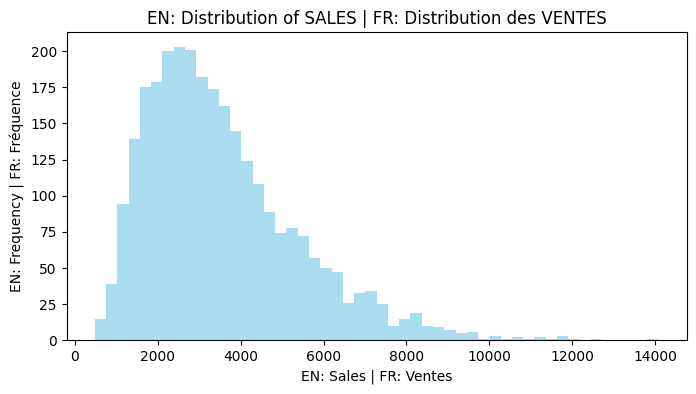


üìà EN: Model Performance | FR: Performance du Mod√®le
   RMSE: 1165.96 | R¬≤: 0.689
üíæ EN: Model saved as sales_model.pkl | FR: Mod√®le sauvegard√© sous sales_model.pkl


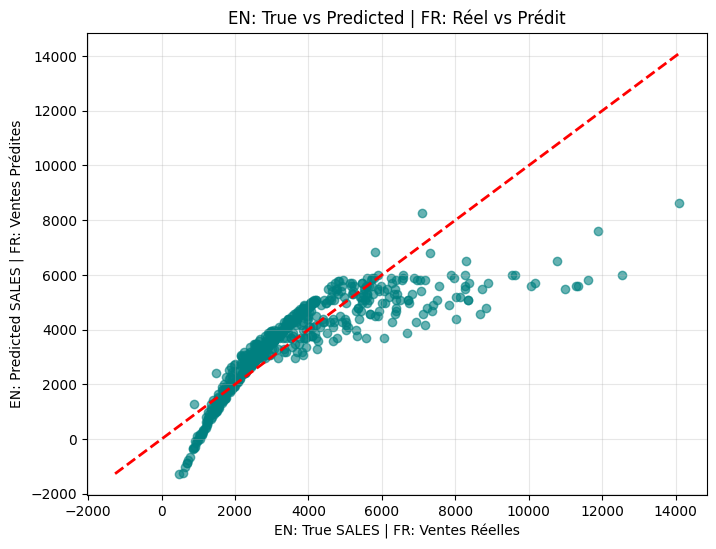


üìò EN: Model Coefficients | FR: Coefficients du Mod√®le
   QUANTITYORDERED: 100.76
   PRICEEACH:       59.36
   Intercept:       -4975.41


In [6]:
# daily_practice.py
# EN: Daily ML Practice ‚Äì Quick Demo with Real Sales Data
# FR: Pratique Quotidienne en ML ‚Äì D√©mo Rapide avec Donn√©es de Ventes R√©elles

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# === 1. Load Data / Chargement des Donn√©es ===
URL = "https://raw.githubusercontent.com/astridcvr/daily-ml-practice/main/sales_data_sample.csv"

def load_sales_data() -> pd.DataFrame:
    """
    EN: Load e-commerce sales dataset from GitHub
    FR: Charge le jeu de donn√©es de ventes e-commerce depuis GitHub
    """
    try:
        df = pd.read_csv(URL, encoding='latin1')
        print(f"‚úÖ EN: Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
        print(f"‚úÖ FR: Donn√©es charg√©es : {df.shape[0]} lignes, {df.shape[1]} colonnes")
        return df
    except Exception as e:
        print("‚ùå EN: Error loading data | FR: Erreur lors du chargement des donn√©es")
        print(e)
        return pd.DataFrame()


# === 2. Quick EDA / Analyse Exploratoire Rapide ===
def quick_eda(df: pd.DataFrame):
    """
    EN: Display basic stats and sales distribution
    FR: Affiche les statistiques de base et la distribution des ventes
    """
    if df.empty:
        print("‚ö†Ô∏è EN: No data available. FR: Aucune donn√©e disponible.")
        return

    print("\nüìä EN: Target variable ‚Äì SALES | FR: Variable cible ‚Äì SALES")
    print(df['SALES'].describe())

    # Histogram
    plt.figure(figsize=(8, 4))
    df['SALES'].hist(bins=50, color='skyblue', alpha=0.7)
    plt.title("EN: Distribution of SALES | FR: Distribution des VENTES")
    plt.xlabel("EN: Sales | FR: Ventes")
    plt.ylabel("EN: Frequency | FR: Fr√©quence")
    plt.grid(False)
    plt.show()


# === 3. Train Simple Model / Entra√Æner un Mod√®le Simple ===
def train_sales_model(df: pd.DataFrame):
    """
    EN: Predict SALES using QUANTITYORDERED and PRICEEACH
    FR: Pr√©dire SALES avec QUANTITYORDERED et PRICEEACH
    """
    if df.empty:
        print("‚ö†Ô∏è EN: No data to train model. FR: Aucune donn√©e pour entra√Æner le mod√®le.")
        return None, None, None, None

    np.random.seed(42)
    X = df[['QUANTITYORDERED', 'PRICEEACH']]
    y = df['SALES']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\nüìà EN: Model Performance | FR: Performance du Mod√®le")
    print(f"   RMSE: {rmse:.2f} | R¬≤: {r2:.3f}")

    # Save model
    joblib.dump(model, "sales_model.pkl")
    print("üíæ EN: Model saved as sales_model.pkl | FR: Mod√®le sauvegard√© sous sales_model.pkl")

    return model, X_test, y_test, y_pred


# === 4. Plot Results / Visualiser les R√©sultats ===
def plot_predictions(y_test, y_pred):
    """
    EN: Scatter plot of true vs predicted sales
    FR: Nuage de points des ventes r√©elles vs pr√©dites
    """
    if y_test is None or y_pred is None:
        print("‚ö†Ô∏è EN: Missing prediction data | FR: Donn√©es de pr√©diction manquantes.")
        return

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    plt.xlabel("EN: True SALES | FR: Ventes R√©elles")
    plt.ylabel("EN: Predicted SALES | FR: Ventes Pr√©dites")
    plt.title("EN: True vs Predicted | FR: R√©el vs Pr√©dit")
    plt.grid(True, alpha=0.3)
    plt.show()


# === 5. Main Script / Script Principal ===
if __name__ == "__main__":
    df = load_sales_data()
    quick_eda(df)
    model, X_test, y_test, y_pred = train_sales_model(df)
    plot_predictions(y_test, y_pred)

    if model:
        print(f"\nüìò EN: Model Coefficients | FR: Coefficients du Mod√®le")
        print(f"   QUANTITYORDERED: {model.coef_[0]:.2f}")
        print(f"   PRICEEACH:       {model.coef_[1]:.2f}")
        print(f"   Intercept:       {model.intercept_:.2f}")
